**Nome do Acadêmico:** Adjalma MAchado Aguiar Junior

**Matrícula:**

# Especificação de Imagens com Redes Neurais Convolucionais

 O nosso trabalho aqui é entender, de forma ilustrativa, como podemos passar uma imagem para um modelo de Inteligência Artificial e receber classificação.

Uma área específica que tem tido bastante pesquisa e investimento em torno de Machine Learning e Inteligência Artificial, é a área de saúde. Com dados médicos de uma pessoa, uma rede neural pode classificar e identificar se uma pessoa possui ou não uma doença específica por exemplo, auxiliando um médico na examinação de um paciente de forma que ele seja mais preciso, e eficiente. Não só isso, redes neurais podem trazer novos insights no diagnóstico de pacientes, ao aprender os dados e designar uma importância a cada uma das variáveis nos dados do paciente.

Por exemplo temos o diagnóstico de exames de Raios-X que é um ótimo tipo de classificação de imagem. Com a radiografia dos pulmões o médico pode identificar se o paciente possui ou não algum tipo de câncer. Um cientista de dados não tem o conhecimento médico, mas caso tenhamos uma grande base de dados com imagens de pulmões juntamente de seus diagnósticos, saudável ou não, podemos treinar um modelo que aprenda a classificá-los. Ajustado o modelo, podemos retornar a probabilidade de um exame de pulmão apresentar câncer com base em milhares de casos já classificados, isso poderia auxiliar nos prognósticos médicos.

A Identificão  de imagem ou de um vídeo possuí diversas aplicações sendo uma das mais definidas a categorização de fotos do Google Photos em sua galeria. Co Como podemos analisar ele utiliza a classificação para agrupar e organizar as fotos em elementos em . Nem sempre o reconhecimento é perfeito e até por isso é comum aparecer uma mensagem do aplicativo solicitando para confirmar algumas fotos. Ao concretizarmos isto estamos ajudando a treinar  o poder de classificação do modelo utilizado.



>## Objetivo

O nosso objetivo aqui é entender, de forma ilustrada, como podemos passar uma imagem para um modelo de Inteligência Artificial e receber classificação.
Neste trabalho iremos abordar como são representadas as imagens em dados para o modelo, as estruturas que compõe uma Rede Neural Convolucional e finalizamos com uma aplicação no conjunto de dados conhecido como CIFAR-10.

# Especificação Técnica




**Dataset: Aplicação - CIFAR-10**

O conjunto de dados conhecido como CIFAR-10 é muito popular quando começamos a estudar RNC. Nossa aplicação é baseada no tutorial do Tensorflow com essa base. Vamos utilizar o pacote Keras com a estrutura Sequential para organizar as camadas.

**Download e Preparação de dados**

 O dataset CIFAR10 possui 60.000 imagens coloridas classificadas em 10 categorias balanceadas, isto é, cada categoria possui 6 mil imagens. Os dados estão divididos em 50.000 imagens para treinamento e 10.000 para testes.

Iremos ressaltar que as classes são exclusivas, não há imagens com mais de uma categoria presente.Com a documentação sabemos que essas imagens devem ser classificadas em uma das seguintes categorias: avião, automóvel, pássaro, gato, cervo, cachorro, sapo, cavalo, navio e caminhão.

As imagens possuem dimensão 32x32x3 ou seja, 32 pixels de largura e altura e 3 canais de cores.

**Modelo**

A estrutura de modelo é composta de dois pares de convolução e agrupamento seguido de duas camadas totalmente conectadas. O resultado do model.summary() nos resume muito bem os parâmetros que fixamos no modelo juntamente das dimensões do dado em cada camada:

# Importação das bibliotecas




In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np



# Carregamento da base de dados CIFAR-10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalização de Pixels entre 0 e 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Pré-processamento

In [ ]:
# Aplicar técnicas de pré-processamento de dados (uma técnica utilizada para gerar novas imagens a partir das imagens existentes, aplicando transformações aleatórias a elas)
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

In [ ]:
# Aumentar o tamanho do conjunto de treinamento com data augmentation
train_images = data_augmentation(train_images)

In [ ]:
# Aumentar o tamanho do conjunto de testes com data augmentation
test_images = data_augmentation(test_images)

# Definição da arquitetura do modelo CNN

In [ ]:
# Aumentar a complexidade do modelo
model = models.Sequential(name='CNN-CIFAR10')
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

model.summary()

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_5 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                       

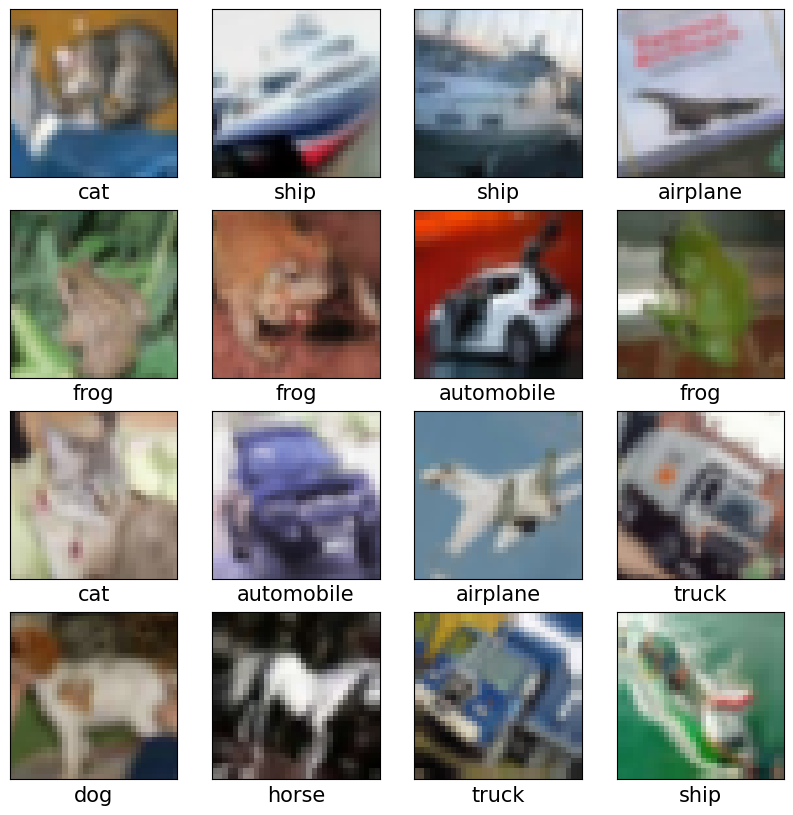

In [ ]:
# Visualizando uma amostra dos dados
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[test_labels[i][0]], fontsize=15)
plt.show()

# Compilação e treinamento do modelo

In [ ]:
# Ajustar os hiperparâmetros do modelo
opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Treinar o modelo de testes
history = model.fit(test_images, test_labels, epochs=10)

Epoch 1/10
313/313 [==============================] - 56s 170ms/step - loss: 2.2178 - accuracy: 0.2748
Epoch 2/10
313/313 [==============================] - 52s 164ms/step - loss: 1.7435 - accuracy: 0.3758
Epoch 3/10
313/313 [==============================] - 51s 163ms/step - loss: 1.6009 - accuracy: 0.4168
Epoch 4/10
313/313 [==============================] - 48s 152ms/step - loss: 1.5203 - accuracy: 0.4542
Epoch 5/10
313/313 [==============================] - 48s 154ms/step - loss: 1.4534 - accuracy: 0.4780
Epoch 6/10
313/313 [==============================] - 49s 157ms/step - loss: 1.3847 - accuracy: 0.5041
Epoch 7/10
313/313 [==============================] - 50s 159ms/step - loss: 1.3413 - accuracy: 0.5256
Epoch 8/10
313/313 [==============================] - 46s 148ms/step - loss: 1.2967 - accuracy: 0.5400
Epoch 9/10
313/313 [==============================] - 50s 161ms/step - loss: 1.2498 - accuracy: 0.5578
Epoch 10/10
313/313 [==============================] - 48s 153ms/step - l

In [ ]:
# Treinar o modelo de treinamento com mais épocas
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 263s 168ms/step - loss: 1.2820 - accuracy: 0.5508 - val_loss: 1.1530 - val_accuracy: 0.5854
Epoch 2/50
1563/1563 [==============================] - 263s 168ms/step - loss: 1.1783 - accuracy: 0.5881 - val_loss: 1.1085 - val_accuracy: 0.6037
Epoch 3/50
1563/1563 [==============================] - 253s 162ms/step - loss: 1.1152 - accuracy: 0.6132 - val_loss: 1.0116 - val_accuracy: 0.6412
Epoch 4/50
1563/1563 [==============================] - 249s 159ms/step - loss: 1.0695 - accuracy: 0.6285 - val_loss: 1.0151 - val_accuracy: 0.6484
Epoch 5/50
1563/1563 [==============================] - 248s 159ms/step - loss: 1.0321 - accuracy: 0.6444 - val_loss: 0.9370 - val_accuracy: 0.6715
Epoch 6/50
1563/1563 [==============================] - 246s 158ms/step - loss: 0.9977 - accuracy: 0.6554 - val_loss: 0.9431 - val_accuracy: 0.6744
Epoch 7/50
1563/1563 [==============================] - 249s 159ms/step - loss: 0.9702 - accuracy: 0.6667 - val_

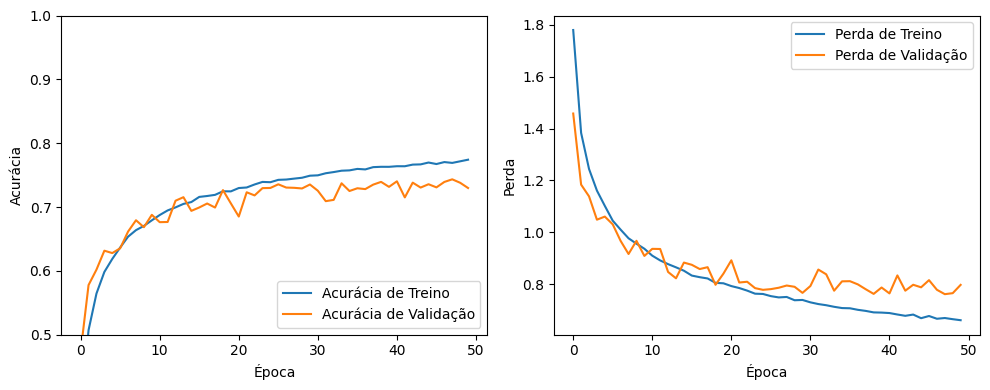

In [ ]:
# Plotar as curvas de aprendizado
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

# Modelo antigo

In [ ]:
#model = models.Sequential(name='CNN-CIFAR10')
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(10))

#model.summary()

Model: "CNN-CIFAR10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              

In [ ]:
#model.compile(optimizer='adam',
#             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#            metrics=['accuracy'])
#
#history = model.fit(train_images, train_labels, epochs=10,
#                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 88s 55ms/step - loss: 1.5103 - accuracy: 0.4479 - val_loss: 1.2472 - val_accuracy: 0.5553
Epoch 2/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.1527 - accuracy: 0.5920 - val_loss: 1.1129 - val_accuracy: 0.6038
Epoch 3/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.0150 - accuracy: 0.6437 - val_loss: 1.0529 - val_accuracy: 0.6245
Epoch 4/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9244 - accuracy: 0.6768 - val_loss: 0.9407 - val_accuracy: 0.6708
Epoch 5/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8532 - accuracy: 0.7026 - val_loss: 0.9012 - val_accuracy: 0.6852
Epoch 6/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.7900 - accuracy: 0.7246 - val_loss: 0.9331 - val_accuracy: 0.6801
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7427 - accuracy: 0.7397 - val_loss: 0.9020 -

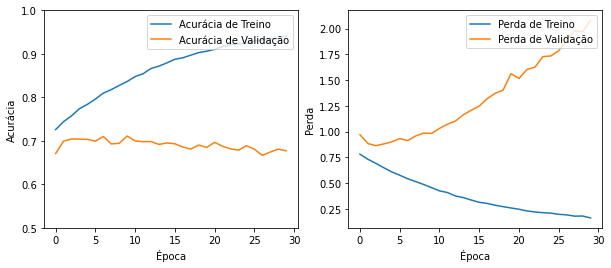

In [ ]:
#plt.figure(figsize=(10,4))

#plt.subplot(1,2,1)
#plt.plot(history.history['accuracy'], label='Acurácia de Treino')
#plt.plot(history.history['val_accuracy'], label = 'Acurácia de Validação')
#plt.xlabel('Época')
#plt.ylabel('Acurácia')
#plt.ylim([0.5, 1])
#plt.legend(loc='upper right')

#plt.subplot(1,2,2)
#plt.plot(history.history['loss'], label='Perda de Treino')
#plt.plot(history.history['val_loss'], label = 'Perda de Validação')
#plt.xlabel('Época')
#plt.ylabel('Perda')
#plt.legend(loc='upper right')

#plt.show()

# Visualização dos resultados

In [ ]:
# Realizar previsões utilizando o modelo de testes
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

313/313 [==============================] - 14s 43ms/step


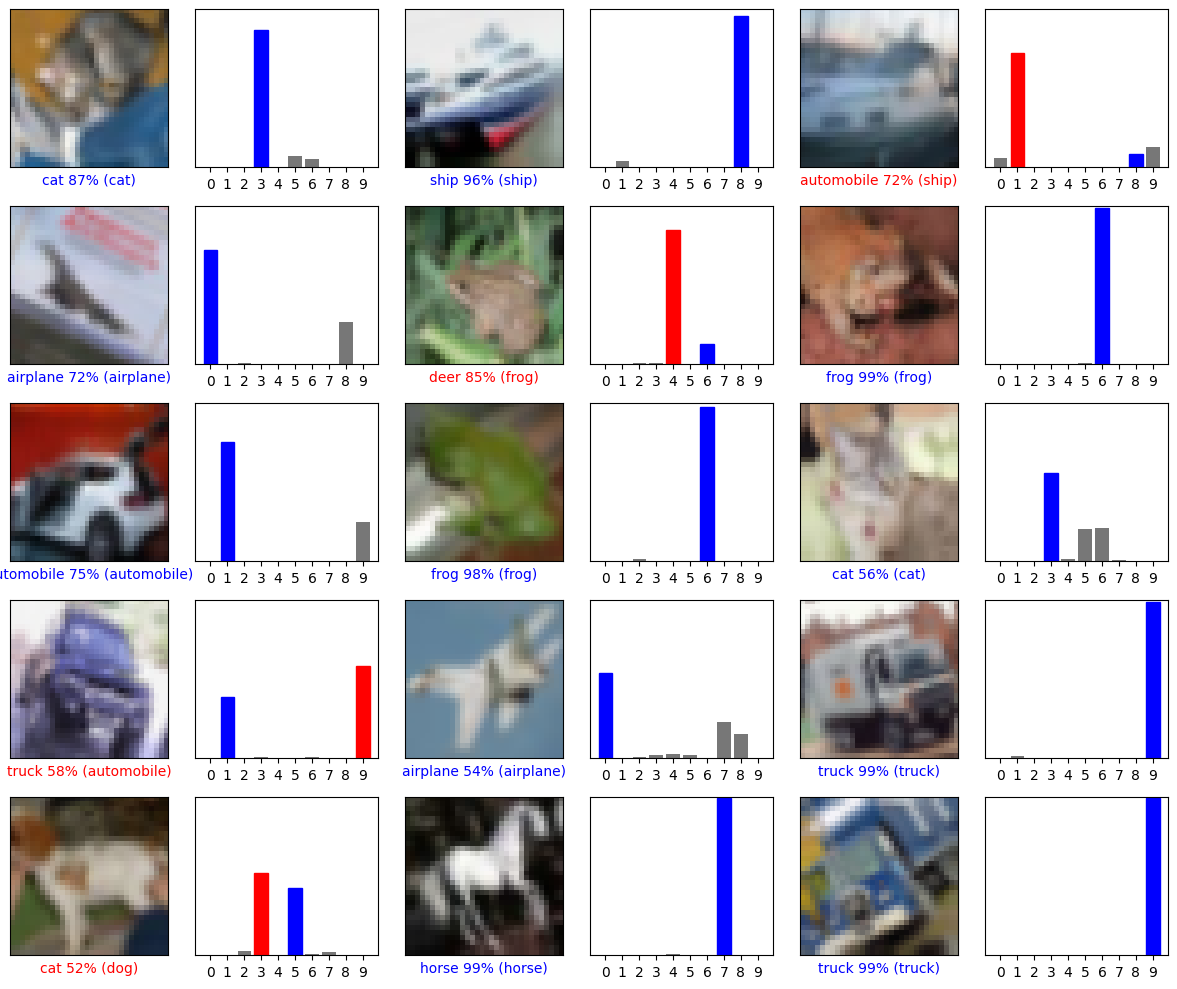

In [ ]:
# Previsões corretas são marcadas em azul, erradas em vermelho
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# Realizar previsões utilizando o modelo treinado
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(train_images)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

1563/1563 [==============================] - 60s 38ms/step


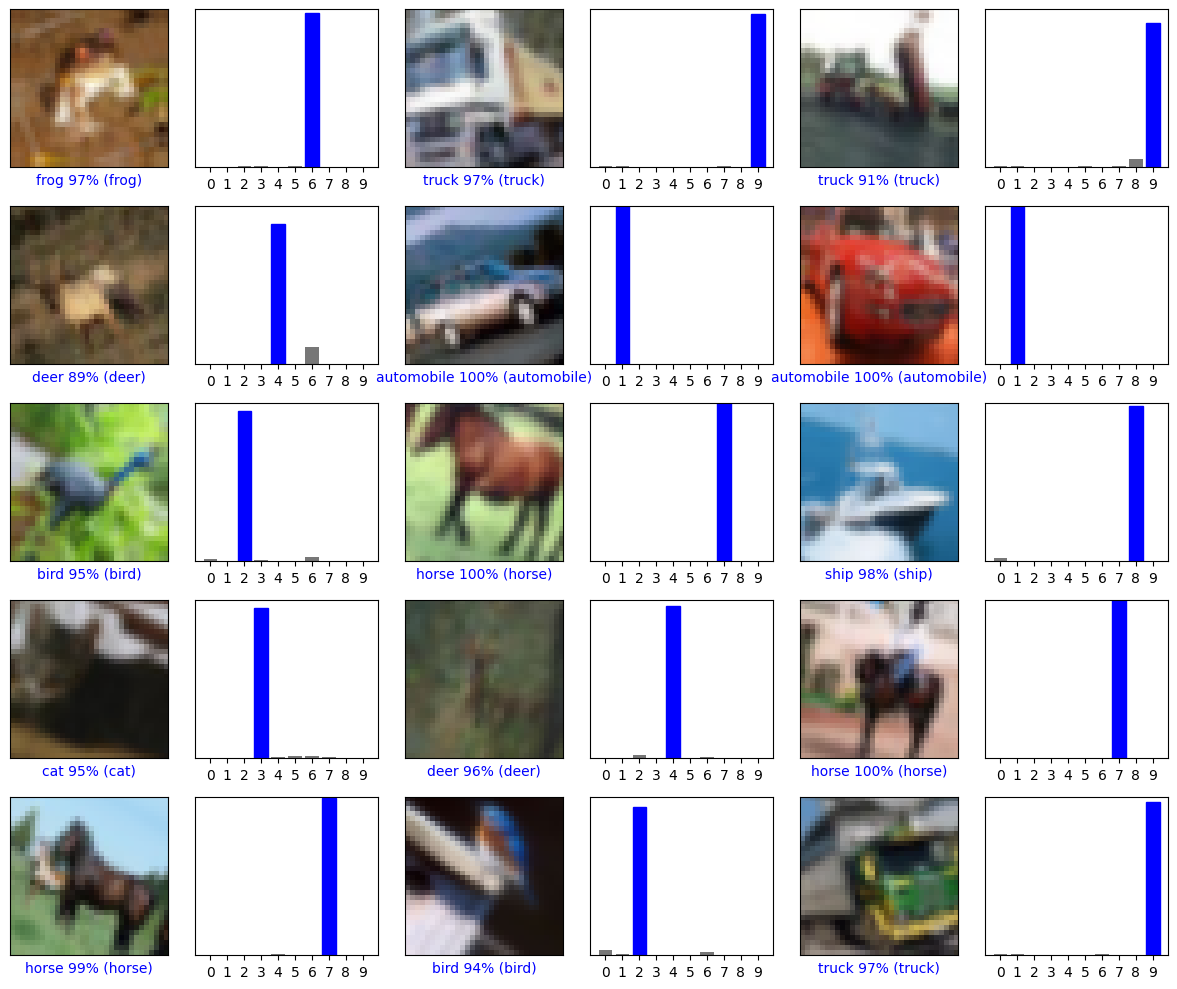

In [ ]:
# Previsões corretas são marcadas em azul, erradas em vermelho
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], train_labels, train_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], train_labels)
plt.tight_layout()
plt.show()